<center><h1> Training Parameterized Neural Network</h1>
John Ignacio R.M. Jun 2020</center>

In [1]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import read_dataset, split_dataset_bytag, BinClassifModelV1 as BC1
import pandas as pd

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
source_path = "../../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

In [3]:
df = read_dataset(source_path, signal, bg, "SR", None)
sets = split_dataset_bytag(df, 0.6, 0.2, 0.2, seed)
x_train, x_val, x_test = sets["x"].values()
y_train, y_val, y_test = sets["y"].values()
w_train, w_val, w_test = sets["w"].values()
print(x_train.shape, x_val.shape, x_test.shape)

(48711, 15) (16238, 15) (16240, 15)


Train on 48711 samples, validate on 16238 samples
Epoch 1/50
48711/48711 [==============================] - 7s 144us/step - loss: 8.9055e-04 - val_loss: 5.0052e-04
Epoch 2/50
48711/48711 [==============================] - 6s 124us/step - loss: 6.8133e-04 - val_loss: 5.2085e-04
Epoch 3/50
48711/48711 [==============================] - 7s 136us/step - loss: 6.1375e-04 - val_loss: 5.0278e-04
Epoch 4/50
48711/48711 [==============================] - 7s 136us/step - loss: 5.9229e-04 - val_loss: 4.8016e-04
Epoch 5/50
48711/48711 [==============================] - 7s 136us/step - loss: 5.6897e-04 - val_loss: 5.0111e-04
Epoch 6/50
48711/48711 [==============================] - 7s 135us/step - loss: 5.6595e-04 - val_loss: 4.6805e-04
Epoch 7/50
48711/48711 [==============================] - 7s 136us/step - loss: 5.4057e-04 - val_loss: 4.6778e-04
Epoch 8/50
48711/48711 [==============================] - 7s 137us/step - loss: 5.4409e-04 - val_loss: 4.4136e-04
Epoch 9/50
48711/48711 [==============

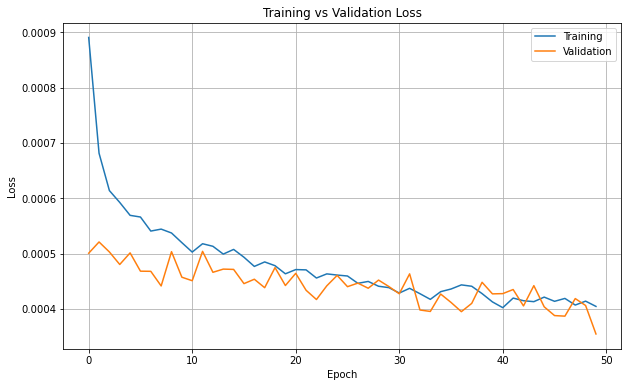

2020-06-25 15:41:34.991610: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-25 15:41:35.001401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-25 15:41:35.001670: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-06-25 15:41:35.001719: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-25 15:41:35.001771: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-06-25 15:41:35.003278: I tensorflow/stream_executor/platform/def

In [7]:
bc1 = BC1(x_train.shape[1])
bc1.fit(x_train, y_train, w_train, x_val, y_val, w_val, 50)
bc1.plot_loss()

In [8]:
bc1.evaluate(x_test, y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11166
           1       0.94      0.84      0.89      5074

    accuracy                           0.93     16240
   macro avg       0.94      0.91      0.92     16240
weighted avg       0.94      0.93      0.93     16240

Confussion Matrix
[[10896   270]
 [  788  4286]]


In [9]:
bc1.save("../../saved_models", "paramtagv2_jun_2020")

modelo
modelo
historia
mas historia


### Old functions

In [ ]:
#new
def trainvaltest_split_bytag(x, y, seed, train_size, val_size, test_size):

    x_tag = {tag: x[x[col_names["tag"]] == tag] for tag in tags}
    y_tag = {tag: y[x[col_names["tag"]] == tag] for tag in tags}

    x_train, x_val, x_test, y_train, y_val, y_test = ({},{},{},{},{},{})

    for t in tags:
        x_train[t], x_val[t], x_test[t], y_train[t], y_val[t], y_test[t] = trainvaltest_split(
            x_tag[t], y_tag[t], seed, train_size, val_size, test_size
        )

    x_train, y_train = shuffle(pd.concat(x_train.values()),np.concatenate(list(y_train.values())),random_state=seed)
    x_val, y_val = shuffle(pd.concat(x_val.values()),np.concatenate(list(y_val.values())),random_state=seed)
    x_test, y_test =shuffle(pd.concat(x_test.values()),np.concatenate(list(y_test.values())),random_state=seed)

    return (x_train.reset_index(drop=True), x_val.reset_index(drop=True), x_test.reset_index(drop=True),
    y_train, y_val, y_test)


def split_dataset_bytag(df, train_size, val_size, test_size, seed):

    x = df.drop(columns = ["label"])
    y = df["label"].values

    #object where all the datasets will be stored
    sets = {}

    #split into train, val and test sets
    x_train, x_val, x_test, y_train, y_val, y_test = trainvaltest_split_bytag(x,y,seed,train_size,val_size,test_size)
    x_test_bytag = {tag: x_test[x_test[col_names["tag"]] == tag]  for tag in tags}
    y_test_bytag = {tag: y_test[x_test[col_names["tag"]] == tag]  for tag in tags}

    #all the sets for train, val and test will be stored here
    w_train, w_val, w_test = pop_col_from_dfs([x_train, x_val, x_test], col_names["weight"])
    sets["w"] = {"train": w_train, "val": w_val, "test": w_test}

    #scale
    scaler = StandardScaler().fit(x_train)
    x_train, x_val, x_test = [pd.DataFrame(scaler.transform(df),columns=df.columns) for df in [x_train, x_val, x_test]]
    sets["x"] = {"train": x_train, "val": x_val, "test": x_test}

    #reshape y
    y_train, y_val, y_test = rotate_vectors([y_train, y_val, y_test])
    sets["y"] = {"train": y_train, "val": y_val, "test": y_test}

    for tag in tags:
        sets[tag] = {}
        x_test, y_test = (x_test_bytag[tag], y_test_bytag[tag])
        sets[tag]["w_test"] = pop_col_from_dfs([x_test], col_names["weight"])[0]
        sets[tag]["x_test"] = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
        sets[tag]["y_test"] = rotate_vectors([y_test])[0]

    return sets

#old
def join_tag_sets(sets, seed):
    #train join
    x_train = pd.concat([sets[tag]["x"]["train"] for tag in tags])
    y_train = np.concatenate([sets[tag]["y"]["train"] for tag in tags])
    w_train = np.concatenate([sets[tag]["w"]["train"] for tag in tags])
    x_train, y_train, w_train = shuffle(x_train, y_train, w_train, random_state = seed)
    #val join
    x_val = pd.concat([sets[tag]["x"]["val"] for tag in tags])
    y_val = np.concatenate([sets[tag]["y"]["val"] for tag in tags])
    w_val = np.concatenate([sets[tag]["w"]["val"] for tag in tags])
    x_val, y_val, w_val = shuffle(x_val, y_val, w_val, random_state = seed)
    #test join
    x_test = pd.concat([sets[tag]["x"]["test"] for tag in tags])
    y_test = np.concatenate([sets[tag]["y"]["test"] for tag in tags])
    w_test = np.concatenate([sets[tag]["w"]["test"] for tag in tags])
    x_test, y_test, w_test = shuffle(x_test, y_test, w_test, random_state = seed)

    return x_train, y_train, w_train, x_val, y_val, w_val, x_test, y_test, w_test

def split_dataset_bytag(df, train_size, val_size, test_size, seed):

    x = df.drop(columns = ["label"])
    y = df["label"].values

    #object where all the datasets will be stored
    sets = {}

    x_tag = {tag: x[x[col_names["tag"]] == tag] for tag in tags}
    y_tag = {tag: y[x[col_names["tag"]] == tag] for tag in tags}

    #split into train, val and test sets
    splits = {tag: trainvaltest_split(x_tag[tag], y_tag[tag], seed, train_size, val_size, test_size) for tag in tags}
    
    for tag in tags:
        sets[tag] = {}
        x_train, x_val, x_test, y_train, y_val, y_test = splits[tag]

        #all the sets for train, val and test will be stored here
        w_train, w_val, w_test = pop_col_from_dfs([x_train, x_val, x_test], col_names["weight"])
        sets[tag]["w"] = {"train": w_train, "val": w_val, "test": w_test}

        #scale
        x_train, x_val, x_test = standar_scale_dfs([x_train, x_val, x_test])
        sets[tag]["x"] = {"train": x_train, "val": x_val, "test": x_test}

        #reshape y
        y_train, y_val, y_test = rotate_vectors([y_train, y_val, y_test])
        sets[tag]["y"] = {"train": y_train, "val": y_val, "test": y_test}

    return sets